<a href="https://colab.research.google.com/github/yun-aha/GSTEC/blob/main/210729.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 웹 어플리케이션

detail창의 edit버튼을 로그인 당사자가 아닌 다른 사람이 들어가지 못하도록 if문 사용

In [ ]:
                    {% if target_user == user%}
                    <a href="{% url 'profileapp:update' pk=target_user.profile.pk %}">
                        edit
                    </a>
                    {% endif %}

프로필업데이트뷰에서 successurl을 디테일 창으로 넘어가게 하려면 해당 유저의 디테일 창으로 가게 해야 하고, 이를 위해서는 동적url이기 때문에 따로 함수를 만들어준다.  
- 프로필크리에이트뷰도 넣어준다.


In [ ]:
    def get_success_url(self):
        return reverse('accountapp:detail', kwargs={'pk':self.object.user.pk})   # self.object는 target.profile과 같다.
        # kwargs 안에는 dict가 들어감

# accountapp의 view.py
class AccountUpdateView(UpdateView):
    model = User
    form_class = AccountCreationForm
    context_object_name = 'target_user'
    success_url = reverse_lazy('accountapp:hello_world')
    template_name = 'accountapp/update.html'

    def get_success_url(self):
        return reverse('accountapp:detail',kwargs={'pk':self.object.pk})    # self.object는 target_user이다!


reverse는 함수형 view에서 사용, reverselazy 구분


로그아웃하고 디테일창에 들어갈 수 없도록 하기 위해 decorator 사용해주기  
메소드 변환해주는게 메소드 데코레이터
변환할 데코레이터를 넣어준다.

In [ ]:
# profileapp / decorators.py
def profile_ownership_required(func):
    def decorated(request, *args, **kwargs):
        target_profile = Profile.objects.get(pk=kwargs['pk'])
        if target_profile.user == request.user:
            return func(request, *args, **kwargs)
        else:
            return HttpResponseForbidden()

# profileapp/views.py
@method_decorator(login_required, 'get')
@method_decorator(login_required, 'post')
class ProfileCreateView(CreateView):


@method_decorator(profile_ownership_required,'get')
@method_decorator(profile_ownership_required,'post')
class ProfileUpdateView(UpdateView):


https://fonts.google.com/icons  
아이콘이 필요할 땐 구글!

In [ ]:
# gsweb/templates/head.html   
   
    {# MATERIAL ICONS lINK #}
    <link href="https://fonts.googleapis.com/css2?family=Material+Icons"
      rel="stylesheet">
     

# gsweb\accountapp\templates\accountapp\detail.html
                    <a href="{% url 'profileapp:update' pk=target_user.profile.pk %}" 
                    class="material-icons round_button">      # material-icons 는 구글아이콘 사용하는 방법
                        edit                # round-button은 디자인을 위한 class지정
                    </a>

In [ ]:
#  gsweb/static/base.css
.round_button{
    color: cornflowerblue;
    text-decoration: none;
    box-shadow: 0 0 3px darkslateblue;
    border-radius: 10rem;
    padding: .3rem;
}
.round_button:hover{        # hover는 마우스를 올려놨을 때
    color: red;
}

In [ ]:
# gsweb\accountapp\templates\accountapp\detail.html
        <div>
        <a href="{% url 'accountapp:update'  pk=target_user.pk %}"
        class="material-icons round_button mx-2">
            settings    # google icon에서 가져오려면 이름을 구글 아이콘에 있는 걸로 바꿔주면 바뀐다!
        </a>
        
        <a href="{% url 'accountapp:delete' pk=target_user.pk %}"
        class="material-icons round_button mx-2">
            close
        </a>
    </div>

# div층을 합쳐준다. 한라인에 보이도록,
# class에 mx-2는 부트스트랩의 마진으로 x축으로 2를 의미

magic grid https://jsfiddle.net/eolaojo/4pov0rdf/

In [ ]:
app_name = 'articleapp'

urlpatterns = [
    path('list/', TemplateView.as_view(template_name='articleapp/list.html'), name='list'),

]
# TemplateView

# gsweb\articleapp\templates\articleapp\list.html
{% extends 'base.html' %}

{% block content %}

    <style>     # magic grid의 css파일을 넣어주기! style사용
        .container div {
          width: 280px;
          height: 500px;
          background-color: antiquewhite;
          display: flex;
          justify-content: center;
          align-items: center;
          border-radius: 8px;
        }

    .container .item1 { height: 200px; }
    .container .item4 { height: 800px; }
    .container .item6 { height: 600px; }
    .container .item11 { height: 400px; }
    </style>


    <!DOCTYPE html>       # 매직그리드에서 가져오기
<div class="container">
  <div class="item1">1</div>
  <div class="item2">2</div>
  <div class="item3">3</div>
  <div class="item4">4</div>
  <div class="item5">5</div>
  <div class="item6">6</div>
  <div class="item7">7</div>
  <div class="item8">8</div>
  <div class="item9">9</div>
  <div class="item10">10</div>
  <div class="item11">11</div>
  <div class="item12">12</div>
  <div class="item13">13</div>
</div>

{% endblock %}

# 2. 알고리즘

# 3.딥러닝

#### 다중분류

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

red = pd.read_csv('/content/winequality-red.csv', sep = ';')
white = pd.read_csv('/content/winequality-white.csv', sep = ';')

In [ ]:
red['type']   = 0
white['type'] = 1
wine = pd.concat([red, white])


In [ ]:
print(wine['quality'].describe())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


In [ ]:
print(wine['quality'].value_counts())

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


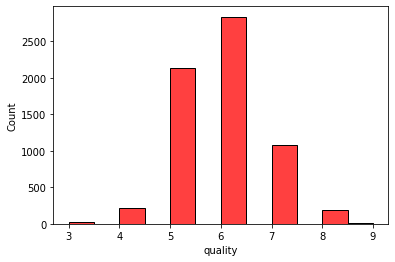

In [ ]:
sns.histplot(wine['quality'], color='red', binwidth=0.5)  # binwidth는 사이의 거리

In [ ]:
wine.loc[wine['quality'] <=5, 'new_quality'] = 0
wine.loc[wine['quality'] ==6, 'new_quality'] = 1
wine.loc[wine['quality'] >=7, 'new_quality'] = 2

In [ ]:
print(wine['new_quality'].value_counts())

1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


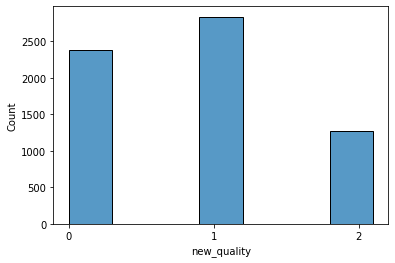

In [ ]:
sns.histplot(wine['new_quality'], binwidth=0.3)
plt.xticks(ticks=[0,2,1])
plt.show()

In [ ]:
del wine['quality']
display(wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,2.0


In [ ]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
display(wine_norm)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,new_quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.0,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.0,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.0,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.0,0.5
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,1.0,0.5
4894,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,1.0,0.0
4895,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,1.0,0.5
4896,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,1.0,1.0


In [ ]:
display(wine_norm['new_quality'][:10])

0    0.0
1    0.0
2    0.0
3    0.5
4    0.0
5    0.0
6    0.0
7    1.0
8    1.0
9    0.0
Name: new_quality, dtype: float64

In [ ]:
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

In [ ]:
train_ratio = 0.8

train_idx = int(len(wine_np) * train_ratio)
print('train_idx: ', train_idx)

train_idx:  5197


In [ ]:
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1:]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1:]

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(5197, 12)
(5197, 1)
(1300, 12)
(1300, 1)


In [ ]:
train_Y_to_categorical = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y_to_categorical = tf.keras.utils.to_categorical(test_Y,num_classes=3)

print(train_Y_to_categorical.shape)
print(test_Y_to_categorical.shape)


(5197, 3)
(1300, 3)


In [ ]:
model_swish_softmax = tf.keras.Sequential([
                                           tf.keras.layers.Dense(units=48, activation='swish', input_shape=(12, )),
                                           tf.keras.layers.Dense(units=24, activation='swish'),
                                           tf.keras.layers.Dense(units=12, activation='swish'),
                                           tf.keras.layers.Dense(units=3, activation='softmax')])

In [ ]:
model_swish_softmax.compile(optimizer=tf.keras.optimizers.Adam(),
                            loss = 'categorical_crossentropy',
                            metrics = ['accuracy'])

In [ ]:
history = model_swish_softmax.fit(train_X, train_Y_to_categorical,
                                  epochs = 200, 
                                  batch_size = 32,
                                  validation_split = 0.2,
                                  callbacks = [tf.keras.callbacks.EarlyStopping(patience= 3 )])

Epoch 1/200
130/130 [==============================] - 1s 3ms/step - loss: 0.6719 - accuracy: 0.7744 - val_loss: 0.4627 - val_accuracy: 0.8269
Epoch 2/200
130/130 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.8015 - val_loss: 0.4170 - val_accuracy: 0.8269
Epoch 3/200
130/130 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.8071 - val_loss: 0.3851 - val_accuracy: 0.8269
Epoch 4/200
130/130 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8088 - val_loss: 0.3782 - val_accuracy: 0.8385
Epoch 5/200
130/130 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8112 - val_loss: 0.3839 - val_accuracy: 0.8269
Epoch 6/200
130/130 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8116 - val_loss: 0.3705 - val_accuracy: 0.8365
Epoch 7/200
130/130 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8102 - val_loss: 0.3697 - val_accuracy: 0.8365

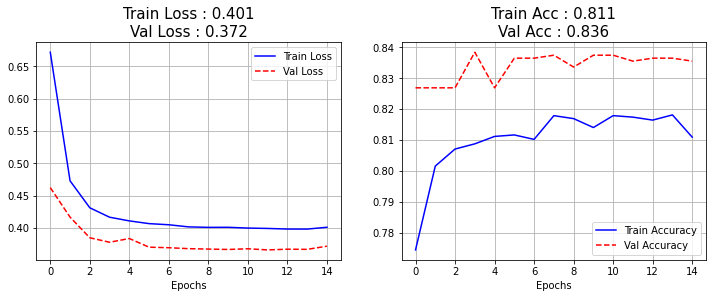

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

val_loss = history.history['val_loss']
loss     = history.history['loss']

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'Train Loss')
plt.plot(history.history['val_loss'], 'r--', label = 'Val Loss')
plt.xlabel('Epochs')
plt.title("Train Loss : {:.3f}\nVal Loss : {:.3f}".\
          format(loss[-1], val_loss[-1]), fontsize = 15)

plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'Val Accuracy')
plt.xlabel('Epochs')
plt.title("Train Acc : {:.3f}\nVal Acc : {:.3f}".\
          format(accuracy[-1], val_accuracy[-1]), fontsize = 15)

plt.grid()
plt.legend()

plt.show()


In [ ]:
model_swish_softmax.evaluate(test_X, test_Y_to_categorical)

41/41 [==============================] - 0s 1ms/step - loss: 0.4106 - accuracy: 0.8123


[0.41059231758117676, 0.8123077154159546]

In [ ]:
pred_Y = model_swish_softmax.predict(test_X)
print('pred_Y:\n', pred_Y)

pred_Y_round_2 = np.round(pred_Y, 2)
print('pred_Y_round_2 : \n',pred_Y_round_2)

pred_Y:
 [[7.82195389e-01 2.17700452e-01 1.04193045e-04]
 [7.73060322e-01 2.26874247e-01 6.54016185e-05]
 [8.35150242e-01 1.64675027e-01 1.74729168e-04]
 ...
 [5.52626312e-01 4.47327316e-01 4.63828510e-05]
 [9.17405784e-01 8.24757367e-02 1.18417280e-04]
 [8.52578878e-01 1.47320569e-01 1.00497135e-04]]
pred_Y_round_2 : 
 [[0.78 0.22 0.  ]
 [0.77 0.23 0.  ]
 [0.84 0.16 0.  ]
 ...
 [0.55 0.45 0.  ]
 [0.92 0.08 0.  ]
 [0.85 0.15 0.  ]]


In [ ]:
print(test_Y_to_categorical[:5])

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [ ]:
pred_Y_argmax = np.argmax(pred_Y_round_2, axis=1)
test_Y_argmax = np.argmax(test_Y_to_categorical, axis=1)

print(pred_Y_argmax[:10])
print(test_Y_argmax[:10])

[0 0 0 0 0 0 0 0 0 0]
[1 0 0 1 0 0 0 0 0 0]


In [ ]:
result = np.equal(pred_Y_argmax, test_Y_argmax)
acc = np.mean(result)
print('ACC : {:.3f}'.format(acc*100))

ACC : 81.308


### Fashion Mnist

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


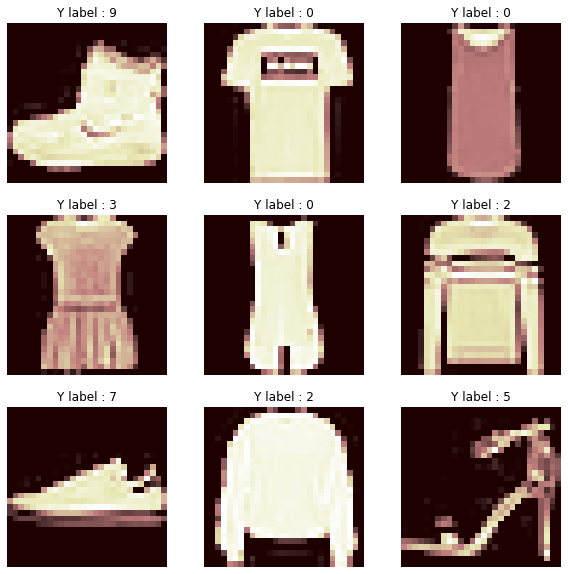

In [ ]:
plt.figure(figsize=(10,10))

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.title('Y label : {}'.format(train_Y[i]))
  plt.axis('off')
  plt.imshow(train_X[i], cmap='pink')

plt.show()

In [ ]:
train_Y[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [ ]:
print("train_X[0].shape :", train_X[0].shape)
print("train_X[0].ndim :", train_X[0].ndim)

train_X[0].shape : (28, 28)
train_X[0].ndim : 2


In [ ]:
print("train_X.shape :", train_X.shape)
print("train_X.ndim :", train_X.ndim)

train_X.shape : (60000, 28, 28)
train_X.ndim : 3


In [ ]:
print(np.min(train_X))
print(np.max(train_X))

0
255


Min Max Normalization

In [ ]:
train_X_norm = train_X / 255.0
print(np.min(train_X_norm))
print(np.max(train_X_norm))

0.0
1.0


In [ ]:
test_X_norm = test_X / 255.0

In [ ]:
Fmnist_Relu_DNN = tf.keras.Sequential([
                                       tf.keras.layers.Flatten(input_shape=(28,28)),
                                       tf.keras.layers.Dense(units=128, activation='relu'),
                                       tf.keras.layers.Dense(units=64, activation='relu'),
                                       tf.keras.layers.Dense(units=32, activation='relu'),
                                       tf.keras.layers.Dense(units=10, activation='softmax')])

In [ ]:
Fmnist_Relu_DNN.compile(optimizer=tf.keras.optimizers.Adam(),
                         loss='sparse_categorical_crossentropy',
                         metrics = ['accuracy'])

In [ ]:
Fmnist_Relu_DNN.summary() #첫번째 층에 param이 없는 이유는 그냥 평평하게 펼쳐준거기 때문
# 파라미터가 많아서 학습속도가 생각보다 느리다

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = Fmnist_Relu_DNN.fit(train_X_norm, train_Y, epochs = 50, validation_split=0.2,
                              batch_size = 32, 
                              callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5281 - accuracy: 0.8119 - val_loss: 0.4608 - val_accuracy: 0.8325
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3856 - accuracy: 0.8591 - val_loss: 0.3633 - val_accuracy: 0.8667
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3460 - accuracy: 0.8728 - val_loss: 0.3635 - val_accuracy: 0.8660
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3236 - accuracy: 0.8811 - val_loss: 0.3630 - val_accuracy: 0.8737
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3025 - accuracy: 0.8878 - val_loss: 0.3388 - val_accuracy: 0.8781
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2860 - accuracy: 0.8940 - val_loss: 0.3556 - val_accuracy: 0.8705
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2745 - accuracy: 0.8969 - val_loss: 0.3298 - val_accuracy:

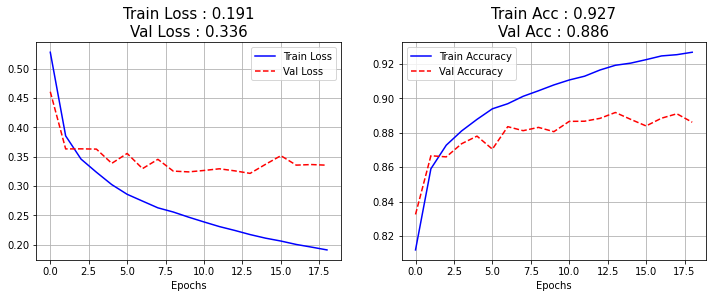

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

val_loss = history.history['val_loss']
loss     = history.history['loss']

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'Train Loss')
plt.plot(history.history['val_loss'], 'r--', label = 'Val Loss')
plt.xlabel('Epochs')
plt.title("Train Loss : {:.3f}\nVal Loss : {:.3f}".\
          format(loss[-1], val_loss[-1]), fontsize = 15)

plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'Val Accuracy')
plt.xlabel('Epochs')
plt.title("Train Acc : {:.3f}\nVal Acc : {:.3f}".\
          format(accuracy[-1], val_accuracy[-1]), fontsize = 15)

plt.grid()
plt.legend()

plt.show()

# 배치 정규화 

In [ ]:
pred_Y = Fmnist_Relu_DNN.predict(test_X[[25]])
print("pred_Y : ", pred_Y)

pred_Y :  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
pred_Y_round = np.round(pred_Y,3)
print(pred_Y_round)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


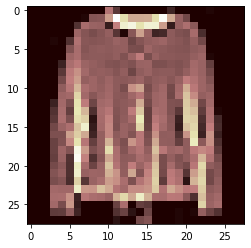

Probability Distribution : 
 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

Pred_Y : 4, Test_Y : 4 → Correct True


In [ ]:
plt.imshow(test_X[25], cmap='pink')
plt.show()

pred_Y_argmax = np.argmax(pred_Y_round)
correct = np.equal(pred_Y_argmax, test_Y[25])

print("Probability Distribution : \n {}".format(pred_Y_round))
print("\nPred_Y : {}, Test_Y : {} → Correct {}".format(pred_Y_argmax, test_Y[25], correct))

# 실습 코드 입니다.

In [ ]:
pred_Y = Fmnist_Relu_DNN.predict(test_X)
pred_Y = np.round(pred_Y,3)

pred_Y_argmax = np.argmax(pred_Y,axis = 1)
print(pred_Y_argmax[:10])

[9 2 1 1 6 1 4 6 5 7]


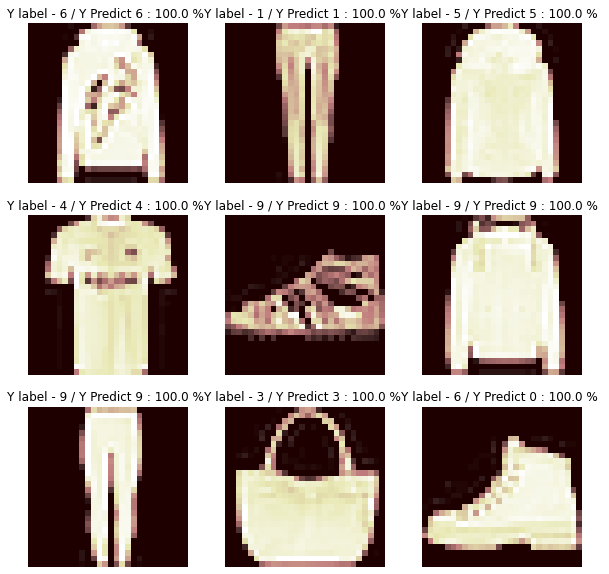

In [ ]:
plt.figure(figsize = (10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    
    i = np.random.choice(range(0,10000))

    plt.title('Y label - {} / Y Predict {} : {} % '.format(test_Y[i], pred_Y_argmax[i], np.round(np.max(pred_Y[:][i]) * 100,3) ))
    plt.axis('off')
    plt.imshow(train_X[i],cmap='pink')

plt.show()

# 4. 머신러닝

In [ ]:
from sklearn.datasets import load_wine

# 데이터 로드
wine = load_wine()
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [ ]:
# 훈련(학습)셋 및 테스트(평가)셋 분리
from sklearn.model_selection import train_test_split
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

(133, 13)

In [ ]:
# 모델학습
from sklearn.svm import LinearSVC

model = LinearSVC(C=1, max_iter=10000).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# 스코어 확인
model.score(X_train, y_train), model.score(X_test,y_test)

(0.7293233082706767, 0.6888888888888889)

In [ ]:
# 예측
y_pred = model.predict(X_test )
y_pred

array([1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1])

#### Linear SVC 실습 02

붓꽃 데이터 분류

In [ ]:
# 데이터 로드
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [ ]:
# 훈련셋 및 테스트셋 분리
from sklearn.model_selection import train_test_split
X = iris_dataset.data
y = iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape

(112, 4)

In [ ]:
# 모델학습
from sklearn.svm import LinearSVC
model = LinearSVC(C=100, max_iter=100000, random_state=42).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# 스코어 확인
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9553571428571429, 1.0)

In [ ]:
# 예측
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

## Linear SVC와 Logistic Regression의 장단점

- 선형 모델의 주요 매개변수는 회귀 모델에서는 alpha였고 LinearSVC와 LogisticRegression에서는 C
- alpha 값이 클수록, C 값이 작을수록 모델이 단순해짐
- 회귀 모델에서 이 매개변수를 조정하는 일이 매우 중요

- L1 규제를 사용할지 L2 규제를 사용할지를 정해야 함
- 중요한 특성이 많지 않다고 생각하면 L1 규제를 사용하고 그렇지 않으면 기본적으로 L2 규제를 사용

- 선형 모델은 학습 속도가 빠르고 예측도 빠름
- 매우 큰 데이터셋과 희소한 데이터셋에도 잘 작동
- 수십만에서 수백만 개의 샘플로 이뤄진 대용량 데이터셋이라면 기본 설정보다 빨리 처리하도록 LogisticRegression과 Ridge에 solver=’sag’ 옵션을 줌

- 선형 모델은 샘플에 비해 특성이 많을 때 잘 작동
- 다른 모델로 학습하기 어려운 매우 큰 데이터셋에도 선형 모델을 많이 사용

In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 8.5 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=a44c7f95d7e42a7a6563776222445358960966b9daa545e55a8e11edb4ed001c
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


# SVM (Support Vector Machines)

- 입력 데이터에서 단순한 초평면(hyperplane)으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것 (복잡한 분류문제)

- 서포트 벡터 머신을 분류와 회귀에 모두 사용할 수 있음 <br>
(선형, 비선형 분류, 회귀, 이상치 탐색에도 사용되는 다목적 머신러닝 모델)

In [ ]:
# warnig 무시하기
from warnings import filterwarnings
filterwarnings('ignore')

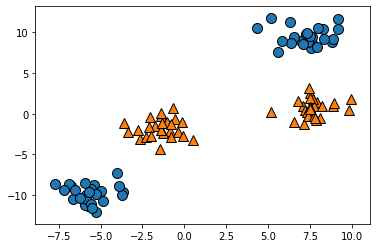

In [ ]:
import mglearn
import matplotlib.pyplot as plt
from mglearn.datasets import make_blobs

# 선형적으로 구분되지 않는 클래스를 가진 이진 분류 세트
X, y = make_blobs(centers=4, random_state=8)
# 이진 분류 세트 시각화
# 클래스 2개로 분리, 이진분류
y = y%2  # 홀짝으로 분리하기
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.show()

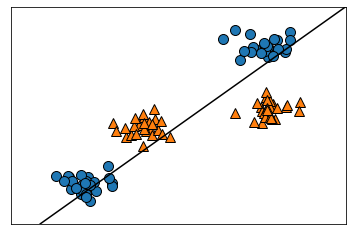

In [ ]:
# 선형 분류
from sklearn.svm import LinearSVC

model = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(model, X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.show()

- 분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어서 이런 데이터셋에는 잘 들어 맞지 않음

선형 모델과 비선형 특징
- 직선과 초평면은 유연하지 못하여 저차원 데이터셋에서는 선형 모델이 매우 제한적
- 선형 모델을 유연하게 만드는 한 가지 방법은 특성끼리 곱하거나 특성을 거듭제곱하는 식으로 새로운 특성을 추가하는 것


특성을 추가하여 입력 특성을 확장 (2차원 -> 3차원)
- 특성1에서 유용한 세 번째 특성을 추가하여 확장한 데이터 세트
- (특성0, 특성1) -> (특성0, 특성1, 특성 ** 2)
- 3차원 산점도로 표현

Matplotlib은 mpl_tookits라는 모듈로 3차원 그래프를 그릴 수 있다.

(100, 2) (100, 3)


Text(0.5, 0, 'feature 1 ** 2')

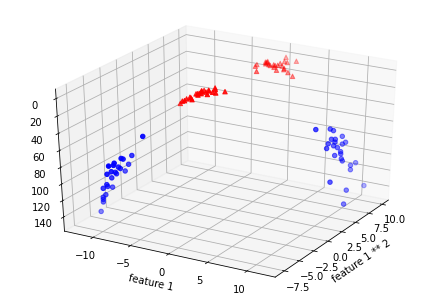

In [ ]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
import numpy as np

# 두 번째 특성을 제곱하여 추가
X_new =  np.hstack([X, X[:,1:]**2])
print(X.shape, X_new.shape)

# 3차원 그래프
fig=plt.figure()
ax = Axes3D(fig, azim=-30, elev=-150)

# y == 0인 포인트를 먼저 그리고 그 다음 y == 1인 포인트를 그림
mask = y ==0
ax.scatter(X_new[mask,0], X_new[mask, 1], X_new[mask,2], c='b')

# ~ 비트 NOT : x의 비트를 뒤집음
mask = y == 1
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='r', marker='^')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
ax.set_xlabel('feature 1 ** 2')

SVM을 이용하여 분류

- 선형 모델과 3차원 공간의 평면을 사용해 두 클래스를 구분
- 확장한 3차원 데이터 세트에서 선형 SVM이 만든 결정 경계

(50, 50) (50, 50) (50, 50)


Text(0.5, 0, 'feature 1 ** 2')

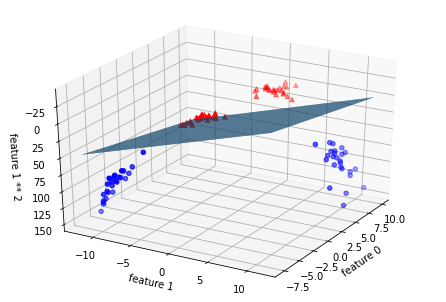

In [ ]:
model = LinearSVC().fit(X_new, y)
w, b = model.coef_.ravel(), model.intercept_

# 선형 결정 경계 그리기
# 3차원 그래프
fig = plt.figure()
ax = Axes3D(fig, azim=-30, elev=-150)

xx = np.linspace(X_new[:, 0].min(), X_new[:, 0].max(), 50)
yy = np.linspace(X_new[:, 1].min(), X_new[:, 1].max(), 50)

XX, YY = np.meshgrid(xx, yy)
zz = -(w[0] * XX + w[1] * YY + b) / w[2]
print(XX.shape, YY.shape, zz.shape)

ax.plot_surface(XX, YY, zz)

# y == 0인 포인트를 먼저 그리고 그 다음 y == 1인 포인트를 그림
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b')
# ~ 비트 NOT : x의 비트를 뒤집음
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
ax.set_zlabel('feature 1 ** 2')

In [ ]:
# 분류 결과 시각화


- 원래 특성으로 투영해보면 이 선형 SVM 모델은 더 이상 선형이 아님
- 직선보다 타원에 가까운 모습을 확인

## 커널 기법 (Kernel trick)

- 데이터셋에 비선형 특성을 추가하여 선형 모델을 강력하게 만들 수 있음

- 하지만, 어떤 특성을 추가해야 할지 알 수 없고, 특성을 많이 추가하면 연산 비용이 커짐

- 커널 기법 : 새로운 특성을 만들지 않고 고차원 분류기를 학습시킬 수 있음 (데이터 포인트들의 거리를 계산 - 스칼라 곱)

- 고차원 공간 맵핑 방법 : 가우시안 커널, RBF (Radial Basis Function) 커널

- 주로 RBF 커널이 사용

## SVM

- Support Vector : 클래스 사이의 경계에 위치한 데이터 포인트

- 새로운 데이터 포인트에 대해 예측하려면 각 서포트 벡터와의 거리를 측정 -> SVC 객체의 dual_coef_ 속성에 저장

사용한 서포트 벡터 수: 11


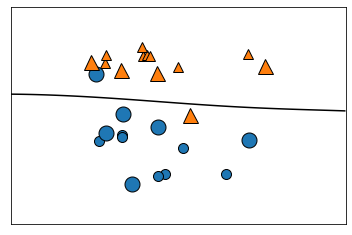

In [ ]:
# RBF 커널을 이용한 SVM으로 만든 결정 경계와 서포트 벡터 시각화
from sklearn.svm import SVC

X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1], y)

model = SVC(C=1, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(model,X)

# 서포트 벡터
sv = model.support_vectors_
print('사용한 서포트 벡터 수:', len(sv))
sv_y = model.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1],sv_y, s=15)

- 선형이 아닌 부드러운 비선형 경계를 만들어냄
- C와 gamma 두 매개변수를 사용

#### SVM의 튜닝 (C, gamma)

- gamma 매개변수는 가우시안 커널 폭의 역수에 해당
 - gamma 매개변수가 하나의 훈련 샘플이 미치는 영향의 범위를 결정
 - 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커짐

- C 매개변수는 선형 모델에서 사용한 것과 비슷한 규제 매개변수
 - 각 포인트의 중요도(정확히는 dual_coef_ 값)를 제한

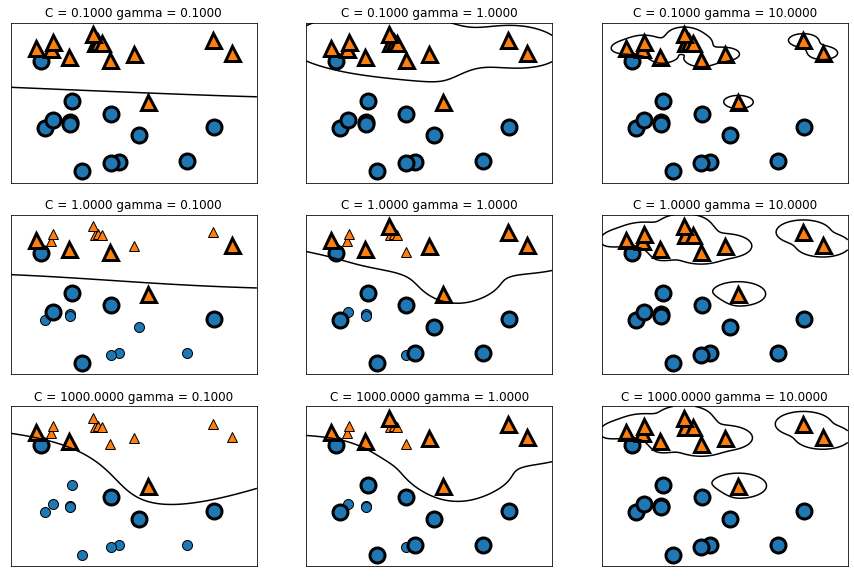

In [ ]:
# C와 gamma 매개변수 설정에 따른 결정 경계와 서포트 벡터 시각화
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for C, axs in zip([-1, 0, 3], axes):
  for gamma, ax in zip([-1,0,1],axs):
    mglearn.plots.plot_svm(C, gamma, ax)

#### SVM 실습 01

유방암 데이터 셋에 SVM 적용

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 모델 학습
model = SVC(C=10000, ).fit(X_train, y_train)

# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

(0.971830985915493, 0.972027972027972)

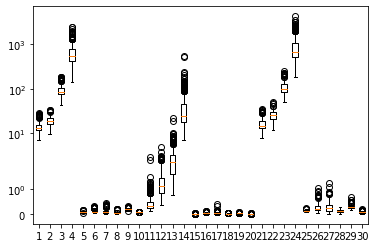

In [ ]:
# 유방암 데이터 세트의 특성 값 범위 시각화 (y 축은 로그 스케일)
plt.boxplot(X_train)
plt.yscale('symlog')
plt.show()

- 유방암 데이터셋의 특성은 자릿수 자체가 완전히 다름

- 일부 모델(선형 모델 등)에서도 어느 정도 문제가 될 수 있지만, 커널 SVM에서는 영향이 아주 큼

##### SVM을 위한 전처리

- 특성 값의 범위가 비슷해지도록 조정하는 것

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.min(axis=0)
X_train_scaled.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])